### ASSIGNMENT NO.1
##### Create a Regression model using the following algorithms on blackFriday dataset

##### 1. Linear Regression
##### 2. Support Vector Machine
##### 3. KNN

##### Q.1 Import all the required libraries

In [97]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sn
import matplotlib.pyplot as plt

##### Import and read the dataset

In [98]:
df=pd.read_csv('blackFriday_train.csv')

In [99]:
df.head()  #It shows first 5 records of the dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [100]:
df.tail()  #It shows the last 5 records of the dataset

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [101]:
df.shape # It shows the number of rows and columns

(550068, 12)

In [102]:
df.columns  # It shows the column names of the datasets

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [103]:
df.info()  # It shows the info of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Finding missing values

In [104]:
df.isnull().sum()  #Shows if there are null values in the dataset

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [105]:
df['Product_Category_2'].unique()    #Shows all unique values in the column

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [106]:
mode1=df['Product_Category_2'].mode()[0]
mode1                                         #Find the mode

8.0

In [107]:
df['Product_Category_2'].fillna(mode1,inplace=True)   #Filling the null values in the column

In [108]:
df.isnull().sum()  #To check if the null values in the Product_Category_2 are filled

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            383247
Purchase                           0
dtype: int64

In [109]:
df['Product_Category_3'].unique()  

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [110]:
mode2=df['Product_Category_3'].mode()[0]
mode2                                    

16.0

In [111]:
df['Product_Category_3'].fillna(mode2,inplace=True)

In [112]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

### After filling the null values in the dataset we are going to find if there is any noise data in the dataset

In [113]:
df.describe()    #It shows the statistical data

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.260768,14.989567,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,4.294093,2.739846,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,8.000000,16.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8.000000,16.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,14.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [114]:
df.corr()     #It shows the correlation analysis of the data

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.002065,-0.000186,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.001566,0.000246,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.010260,0.013978,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.279247,0.317944,-0.343703
Product_Category_2,0.002065,0.001566,0.010260,0.279247,1.000000,0.463188,-0.128651
Product_Category_3,-0.000186,0.000246,0.013978,0.317944,0.463188,1.000000,-0.185945
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.128651,-0.185945,1.000000


## Data Reduction

#### Take only required features for model and drop unnecessary features

In [115]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,8.0,16.0,7969


In [116]:
df.drop(columns={'User_ID','Product_ID'},axis=1,inplace=True)

In [117]:
df.head(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,F,0-17,10,A,2,0,3,8.0,16.0,8370
1,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,F,0-17,10,A,2,0,12,8.0,16.0,1422


### Here Convert the categorical data into nominal data so that the machine can understand it easily

In [118]:
df['Gender'].unique()      

array(['F', 'M'], dtype=object)

In [119]:
df['Gender'] = df['Gender'].map({'F':1, 'M':2})

In [120]:
df.head(3)       #The gender column values has been changed into nominal form

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0-17,10,A,2,0,3,8.0,16.0,8370
1,1,0-17,10,A,2,0,1,6.0,14.0,15200
2,1,0-17,10,A,2,0,12,8.0,16.0,1422


In [121]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [122]:
df['Age'] = df['Age'].map({'0-17':0, '55+':1, '26-35':2, '46-50':3, '51-55':4, '36-45':5, '18-25':6})

In [123]:
df.head(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,A,2,0,3,8.0,16.0,8370
1,1,0,10,A,2,0,1,6.0,14.0,15200
2,1,0,10,A,2,0,12,8.0,16.0,1422


In [124]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [125]:
df['City_Category']=df['City_Category'].map({'A':1, 'C':2, 'B':3})

In [126]:
df.head(3)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,0,10,1,2,0,3,8.0,16.0,8370
1,1,0,10,1,2,0,1,6.0,14.0,15200
2,1,0,10,1,2,0,12,8.0,16.0,1422


In [127]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [128]:
df['Stay_In_Current_City_Years'].replace({'4+':4},inplace=True)   #Here replacing the value 4+ cz machine will not understand 4+

In [129]:
df['Stay_In_Current_City_Years'].unique()

array(['2', 4, '3', '1', '0'], dtype=object)

## Data Transfrmation / Normalization

#### Transforming data into the same scale allows the algorithm to compare the relative relationship between data points better

In [130]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(df)
scale_data = scale.transform(df)
scale_data

array([[-1.74651251, -1.96245227,  0.29486356, ..., -0.29360542,
         0.36879231, -0.1779729 ],
       [-1.74651251, -1.96245227,  0.29486356, ..., -0.75936196,
        -0.36117636,  1.1817558 ],
       [-1.74651251, -1.96245227,  0.29486356, ..., -0.29360542,
         0.36879231, -1.56119326],
       ...,
       [-1.74651251, -0.82604158,  1.06142262, ..., -0.29360542,
         0.36879231, -1.81701338],
       [-1.74651251, -1.39424693, -1.08494277, ..., -0.29360542,
         0.36879231, -1.77162273],
       [-1.74651251, -0.25783624, -1.23825458, ..., -0.29360542,
         0.36879231, -1.7467375 ]])

In [131]:
df1=pd.DataFrame(scale_data,columns=['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'])

In [132]:
df1

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,-1.746513,-1.962452,0.294864,-1.411480,0.109801,-0.833018,-0.610809,-0.293605,0.368792,-0.177973
1,-1.746513,-1.962452,0.294864,-1.411480,0.109801,-0.833018,-1.118912,-0.759362,-0.361176,1.181756
2,-1.746513,-1.962452,0.294864,-1.411480,0.109801,-0.833018,1.675656,-0.293605,0.368792,-1.561193
3,-1.746513,-1.962452,0.294864,-1.411480,0.109801,-0.833018,1.675656,1.103664,0.368792,-1.633858
4,0.572570,-1.394247,1.214734,-0.185933,1.660861,-0.833018,0.659449,-0.293605,0.368792,-0.257805
...,...,...,...,...,...,...,...,...,...,...
550063,0.572570,0.310369,0.754799,1.039615,-0.665728,1.200454,3.708069,-0.293605,0.368792,-1.771025
550064,-1.746513,-0.826042,-1.084943,-0.185933,0.885331,-0.833018,3.708069,-0.293605,0.368792,-1.770428
550065,-1.746513,-0.826042,1.061423,1.039615,1.660861,1.200454,3.708069,-0.293605,0.368792,-1.817013
550066,-1.746513,-1.394247,-1.084943,-0.185933,0.109801,-0.833018,3.708069,-0.293605,0.368792,-1.771623


### Sampling

In [133]:
df_sample = df1.sample(25000,random_state=30)

### Divide the Training data and Testing data

In [134]:
x = df_sample.iloc[:,:-1] 

In [135]:
x

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
125277,0.572570,1.446780,1.214734,1.039615,1.660861,1.200454,0.151346,1.569421,0.368792
278638,0.572570,0.310369,1.214734,-1.411480,0.109801,1.200454,-0.102705,-0.293605,0.368792
42099,0.572570,0.310369,-0.165072,-0.185933,-0.665728,1.200454,-1.118912,-0.293605,0.733777
401672,0.572570,0.878574,1.214734,-0.185933,-0.665728,-0.833018,-0.864860,-0.992240,0.003808
541637,-1.746513,1.446780,-1.084943,-0.185933,0.109801,1.200454,-0.102705,-0.060727,0.368792
...,...,...,...,...,...,...,...,...,...
313717,0.572570,0.878574,1.521358,-0.185933,-1.441258,1.200454,-1.118912,-1.690875,0.368792
125770,0.572570,-0.257836,-0.778319,-0.185933,-0.665728,1.200454,-0.102705,1.103664,0.368792
95489,0.572570,-1.394247,-0.165072,-1.411480,-0.665728,1.200454,0.659449,-0.293605,0.368792
364751,0.572570,0.310369,-0.165072,-1.411480,-0.665728,1.200454,-0.864860,-1.225119,-2.551082


In [136]:
y = df_sample.iloc[:,-1:]

In [137]:
y

,Purchase
125277,0.684848
278638,-0.462859
42099,1.992417
401672,0.795338
541637,-0.462859
...,...
313717,-0.264773
125770,-0.793932
95489,-0.261786
364751,1.318724


# Training tha model by using Linear Regression

### Splitting the training and testing data

In [138]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

### Applying the LinearRegression

In [139]:
from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

## Testing the model

In [140]:
y_predict=linear_reg.predict(x_test)

In [141]:
print(y_predict)
y_predict.shape

[[-0.20747585]
 [ 0.29779302]
 [ 0.57080826]
 ...
 [-0.10503452]
 [-0.01456151]
 [ 0.26039323]]


(5000, 1)

In [142]:
y_test

,Purchase
510584,-0.245462
14346,0.743975
136799,1.219780
2439,-0.147513
397418,-0.633273
...,...
83348,0.497711
467362,2.057716
56284,-0.779200
152065,-0.445539


In [143]:
x_train.shape

(20000, 9)

In [144]:
y_train.shape

(20000, 1)

In [145]:
x_test.shape

(5000, 9)

In [146]:
y_test.shape

(5000, 1)

### Visualising the differences between the actual values and predicted values

Text(0.5, 1.0, 'Actual Values vs True values=Lin-reg')

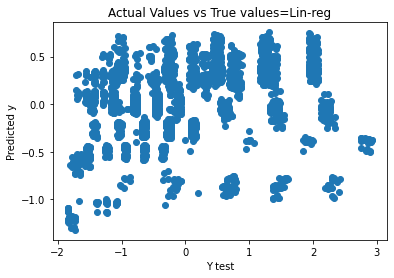

In [147]:
plt.scatter(y_test,y_predict)
plt.xlabel("Y test")
plt.ylabel("Predicted y")
plt.title("Actual Values vs True values=Lin-reg")

### Find the error in the linear regression model

In [148]:
from sklearn.metrics import r2_score,mean_squared_error

In [149]:
from sklearn.metrics import r2_score,mean_squared_error
MSE = mean_squared_error(y_test,y_predict)
print('Mean Square Error=' ,MSE)  #Shows the minimum error


RMSE = np.sqrt(MSE)
print('Root Mean Square Error=',RMSE)

Score = r2_score(y_test,y_predict)
print('Score=',Score)
# r2 score lies between 0 and 1. IF it is closer to 1 then model is good

Mean Square Error= 0.8577348671802377
Root Mean Square Error= 0.9261397665472733
Score= 0.13599131460760716


In [150]:
print('Train Score: ', linear_reg.score(x_train, y_train))  
print('Test Score: ', linear_reg.score(x_test, y_test))

Train Score:  0.13185415806309397
Test Score:  0.13599131460760716


## Training the model by using Support Vector Machine Algo.

### Splitting the training and testing data

In [151]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=30)

#### Applying SVR and Training the model

In [152]:
from sklearn import svm
from sklearn.metrics import mean_squared_error

In [153]:
sv_reg=svm.SVR(kernel='rbf')

In [154]:
sv_reg.fit(x_train,y_train)

C:\Users\F1\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [155]:
y_pred=sv_reg.predict(x_test)

In [156]:
y_pred

array([-0.24513227,  0.28221417,  1.20135829, ..., -0.44589014,
       -0.17570914,  0.36370632])

In [157]:
y_test

,Purchase
510584,-0.245462
14346,0.743975
136799,1.219780
2439,-0.147513
397418,-0.633273
...,...
83348,0.497711
467362,2.057716
56284,-0.779200
152065,-0.445539


In [158]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [159]:
score

0.26136599418137874

In [160]:
a=['rbf','linear','poly']
b=[]

In [161]:
for i in a:
    sv_reg=svm.SVR(kernel=i)
    sv_reg.fit(x_train, y_train.values.ravel())
    y_pred=sv_reg.predict(x_test)
    score=r2_score(y_test,y_pred)
    b.append(score)

In [162]:
b

[0.26136599418137874, 0.11264799120008784, 0.1864468659616696]

In [163]:
df_r=pd.DataFrame({'kernel':a,'score':b})
df_r

,kernel,score
0,rbf,0.261366
1,linear,0.112648
2,poly,0.186447


C:\Users\F1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

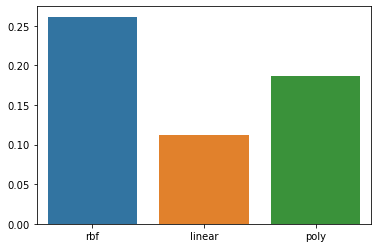

In [164]:
# df_r.plot(kind='bar')
sn.barplot(a,b)

In [165]:
from sklearn.metrics import mean_squared_error

In [166]:
from sklearn.metrics import r2_score,mean_squared_error
MSE_error= mean_squared_error(y_test,y_predict)
print('Mean Square Error=' ,MSE)


RMSE_error= np.sqrt(MSE)
print('Root Mean Square Error=',RMSE)
print('Score=',score)

Mean Square Error= 0.8577348671802377
Root Mean Square Error= 0.9261397665472733
Score= 0.1864468659616696


In [167]:
print('Train Score _SVR: ', sv_reg.score(x_train, y_train))  
print('Test Score _SVR: ', sv_reg.score(x_test, y_test))

Train Score _SVR:  0.2068631755038246
Test Score _SVR:  0.1864468659616696


### Visualising the differences between the actual values and predicted values

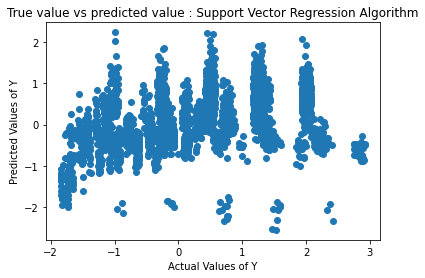

In [168]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values of Y')
plt.ylabel('Predicted Values of Y')
plt.title("True value vs predicted value : Support Vector Regression Algorithm")
plt.show()

## Train the model by using K-Nearest Neighbour Algorithm

In [169]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=30)

In [170]:
from sklearn.neighbors import KNeighborsRegressor
KNN_reg = KNeighborsRegressor(n_neighbors=5)
KNN_reg.fit(x_train,y_train)

KNeighborsRegressor()

In [171]:
y_pred = KNN_reg.predict(x_test)
print(y_pred)
y_pred.shape

[[-0.4184239 ]
 [ 1.01560213]
 [ 0.85374863]
 ...
 [-0.59564652]
 [ 0.33103945]
 [ 0.28154771]]


(5000, 1)

In [172]:
print(y_test)
y_test.shape

        Purchase
510584 -0.245462
14346   0.743975
136799  1.219780
2439   -0.147513
397418 -0.633273
...          ...
83348   0.497711
467362  2.057716
56284  -0.779200
152065 -0.445539
357331  0.718492

[5000 rows x 1 columns]


(5000, 1)

## Visualizing the differences between actual Values and predicted values

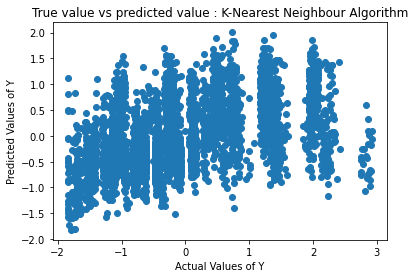

In [173]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values of Y')
plt.ylabel('Predicted Values of Y')
plt.title("True value vs predicted value : K-Nearest Neighbour Algorithm")
plt.show()

In [174]:
from sklearn.metrics import mean_squared_error,r2_score
MSE_knn = mean_squared_error(y_test,y_pred)
print('Mean Square Error ',MSE_knn)

RMSE_knn = np.sqrt(MSE_knn)
print('Root Mean Square Error',RMSE_knn)

Score_knn = r2_score(y_test,y_pred)
print('Score',Score_knn)

Mean Square Error  0.7301871247845864
Root Mean Square Error 0.8545098740123407
Score 0.26447199255220244


In [175]:
print('Train Score _KNN: ', KNN_reg.score(x_train, y_train))  
print('Test Score _KNN: ', KNN_reg.score(x_test, y_test))

Train Score _KNN:  0.5139471123149081
Test Score _KNN:  0.26447199255220244


## Conclusion

#### As per the observation, among all three algorithms the KNN algorithm is more efficient because the mean square error and root mean square error of knn algo. is less than SVR and LinearRegression.and the r2 square score is better than the two algo.